<a href="https://colab.research.google.com/github/adyutaa/TikTok-Sentiment-Analysis/blob/main/TikTok_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report

import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re

!pip install Sastrawi

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('tiktok.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8c029d6c-9282-4034-9838-53f957384007,Amin Santoso,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5,622,34.3.3,2024-04-20 20:26:25,NaN,NaN,34.3.3
1,5be47d92-8ede-4f9a-a613-3107e9bfbde2,monica hsu,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya suka dengan aplikasi tiktok dan aktif men...,5,1332,33.8.5,2024-03-13 23:45:22,NaN,NaN,33.8.5
2,a8d020fa-07ac-46e1-9ec1-9a1d6b24abec,Oppo A16,https://play-lh.googleusercontent.com/a/ACg8oc...,Maaf saya kasih 🌟 2 karena aplikasi nya kurang...,2,30,34.5.5,2024-05-04 02:50:04,NaN,NaN,34.5.5
3,26fbfb0b-c11b-46e5-8e8b-d9a2803615ee,Verdi Ximenes,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok nya sangat bagus tapi pas di buka video...,3,57,33.8.5,2024-04-18 20:02:07,NaN,NaN,33.8.5
4,07d94c25-28a3-4b6d-a404-720513cf1c9a,Nenk shinta,https://play-lh.googleusercontent.com/a-/ALV-U...,Kenapa dengan tiktok saya pas buka muter muter...,2,1799,34.1.5,2024-04-08 15:41:52,NaN,NaN,34.1.5
...,...,...,...,...,...,...,...,...,...,...,...
393,f6998227-f297-4c94-a3b4-c05c79ae3d98,F5X,https://play-lh.googleusercontent.com/a/ACg8oc...,Hallo saya sangat kecewa sama tiktok karena sa...,1,133,25.7.3,2022-08-18 08:50:31,NaN,NaN,25.7.3
394,9c4b27b6-941e-4d45-97ff-9232132d6663,ozho jabra,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi ini sangat penting untuk menghibur da...,5,10,NaN,2020-09-06 13:06:58,NaN,NaN,NaN
395,6f8c4dd1-714c-4210-ba0b-37b70ee02ed8,Sisan Ismail,https://play-lh.googleusercontent.com/a/ACg8oc...,"aplikasi ini sangat bagus dan menghibur, tapi ...",5,5,NaN,2020-07-12 22:41:40,NaN,NaN,NaN
396,adc9f7f6-3586-4fa4-9e4c-01681b9c55f0,Neli Wulansari,https://play-lh.googleusercontent.com/a/ACg8oc...,Banyak ilmu yang didapat dan untuk pengalaman ...,5,81,23.7.3,2022-03-24 20:28:18,NaN,NaN,23.7.3


### CLEANING DATA


In [3]:
# data yang dipakai adalah 2 column dari 'content' dan 'score'
df = df[['content','score']]
df

,content,score
0,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5
1,Saya suka dengan aplikasi tiktok dan aktif men...,5
2,Maaf saya kasih 🌟 2 karena aplikasi nya kurang...,2
3,Tiktok nya sangat bagus tapi pas di buka video...,3
4,Kenapa dengan tiktok saya pas buka muter muter...,2
...,...,...
393,Hallo saya sangat kecewa sama tiktok karena sa...,1
394,Aplikasi ini sangat penting untuk menghibur da...,5
395,"aplikasi ini sangat bagus dan menghibur, tapi ...",5
396,Banyak ilmu yang didapat dan untuk pengalaman ...,5


In [4]:
df.shape

(398, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  398 non-null    object
 1   score    398 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
#sebenernya datanya uda bagus, but lemme drop processing shits over here just in case
df = df.drop_duplicates(subset='content')


In [8]:
df.isnull().sum()

content    0
score      0
dtype: int64

In [9]:
df.isna().sum()

content    0
score      0
dtype: int64

In [10]:
df = df.dropna()
df

,content,score
0,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5
1,Saya suka dengan aplikasi tiktok dan aktif men...,5
2,Maaf saya kasih 🌟 2 karena aplikasi nya kurang...,2
3,Tiktok nya sangat bagus tapi pas di buka video...,3
4,Kenapa dengan tiktok saya pas buka muter muter...,2
...,...,...
393,Hallo saya sangat kecewa sama tiktok karena sa...,1
394,Aplikasi ini sangat penting untuk menghibur da...,5
395,"aplikasi ini sangat bagus dan menghibur, tapi ...",5
396,Banyak ilmu yang didapat dan untuk pengalaman ...,5


In [11]:
df['content'] = df['content'].fillna('')
df

,content,score
0,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5
1,Saya suka dengan aplikasi tiktok dan aktif men...,5
2,Maaf saya kasih 🌟 2 karena aplikasi nya kurang...,2
3,Tiktok nya sangat bagus tapi pas di buka video...,3
4,Kenapa dengan tiktok saya pas buka muter muter...,2
...,...,...
393,Hallo saya sangat kecewa sama tiktok karena sa...,1
394,Aplikasi ini sangat penting untuk menghibur da...,5
395,"aplikasi ini sangat bagus dan menghibur, tapi ...",5
396,Banyak ilmu yang didapat dan untuk pengalaman ...,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  398 non-null    object
 1   score    398 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


In [13]:
df.shape

(398, 2)

In [14]:
# removing symbols, emote, space, double space etc
def doing_magic_shits(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['content'] = df['content'].apply(doing_magic_shits)

In [15]:
# making the text ALL LOWERCASE
df['content'] = df['content'].str.lower()

In [16]:
df.head()

,content,score
0,tiktok sangat bagus bisa berkarya dan mendapat...,5
1,saya suka dengan aplikasi tiktok dan aktif men...,5
2,maaf saya kasih 2 karena aplikasi nya kurang b...,2
3,tiktok nya sangat bagus tapi pas di buka video...,3
4,kenapa dengan tiktok saya pas buka muter muter...,2


### Data Preprocessing

In [17]:
#pisahin column score dari df dulu
score = df['score']

In [18]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
  words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
  mask = (words_count >= min_words) & (words_count <= max_words)
  filtered_df = dataframe[mask]
  return filtered_df

min_words = 3
max_words = 50
df = filter_tokens_by_length(df, 'content', min_words, max_words)

In [19]:
# Normalisasi Data dulu sob
# jangan lupa tambahin satu space koosong di setiap kata sob

norm = {' gk' : ' tidak', ' profisional' : ' profesional', ' skrg' : ' sekarang', ' uwang' : ' uang',
        ' tiktokan' : ' tiktok', ' yg' : ' yang', ' udh' : ' sudah', ' nga' : ' tidak', ' pokonya' : ' pokonya',
        ' slalu' : ' selalu', ' ngelag' : ' lag', ' sdh' : ' sudah', ' emel' : ' email', ' tlong' : ' tolong',
        ' dg' : ' dengan', ' diley' : ' delay', ' mrsa' : ' merasa', ' muter' : ' putar'}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))


<ipython-input-19-64f8cb1e7a06>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: normalisasi(x))


In [20]:
# Stopwords pake SASTRAWI🤩

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)


def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))

<ipython-input-20-b258bcc6b22b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: stopword(x))


In [21]:
#Tokenize Text

tokenized = df['content'].apply(lambda x:x.split())
tokenized

# if you wonder kenapa harus di tokenize: jadi tokenize tu bikin tiap2 kata dipisahkan satu sama lain dikasi jarak pake koma, tujuannya itu biar mempermudah nanti di proses Stemming


0      [tiktok, sangat, bagus, berkarya, mendapat, te...
2      [maaf, kasih, 2, aplikasi, nya, kurang, bagus,...
3      [tiktok, nya, sangat, bagus, pas, buka, video,...
4      [dengan, tiktok, pas, buka, putar, putar, pada...
5      [makin, update, malah, oploadnya, selalu, gaga...
                             ...                        
393    [hallo, sangat, kecewa, sama, tiktok, saya, pu...
394    [aplikasi, sangat, penting, menghibur, menarik...
395    [aplikasi, sangat, bagus, menghibur, sayang, h...
396    [banyak, ilmu, didapat, untuk, pengalaman, dis...
397    [filter, yang, bisa, dipakai, walaupun, di, up...
Name: content, Length: 381, dtype: object

In [22]:
# Stemming: untuk menghapus kata yang memiliki Imbuhan. contoh didapat = dapat

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# # import StemmerFactory class
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# # create stemmer
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()
# # stemming process
# sentence = 'Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan'
# output   = stemmer.stem(sentence)
# print(output)
# # ekonomi indonesia sedang dalam tumbuh yang bangga
# print(stemmer.stem('Mereka meniru-nirukannya'))
# # mereka tiru

def stemming(text_cleaning):
  #create stemmer
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  #stemming process
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return(d_clean)

tokenized = tokenized.apply(stemming)

tiktok sangat bagus karya dapat teman banyak bagai daerah jika untung hasil cuan moga tiktok tambah fitur bagai fasilitas sukses and maju tiktok
maaf kasih 2 aplikasi nya kurang bagus padahal jaring full klw udah buka sekali ga di buka lqi
tiktok nya sangat bagus pas buka video nya nonton tidak kapai jadi di baik yakkk tiktok paling the best
dengan tiktok pas buka putar putar padahal wifi penuh gambar nya putar hitam gak gambar nya di baik dong
makin update malah oploadnya selalu gagal mulu selalu hapus terus tambah buruk aja nih aplikasi
terima kasih tik tok untuk tik tok ini masuk dalam peringkat social populer mudah cari mengupdatenya terima kasih
aku suka sama nih tiktok aku serba gagal buat bikin video aku aplod tidak like
poko bagus kalau lebih bagus seperti efect kurang lain
kalau mau bikin video lewat templat kadang kadang engga mau simpan video kadang dan kadang engga
aplikasi bagus banget kenapa aku tambah lagu tik tok favorit muncul sana pliss pulih kan
telah baharu wilayah 

In [23]:
#gabungin lagi kolom content(tokenized) sama score nerdasarkan index
score.drop(columns=["Unnamed: 0"], inplace=True)
df = pd.concat([tokenized, score], axis=1)
df.head()

,content,score
0,tiktok sangat bagus karya dapat teman banyak b...,5
2,maaf kasih 2 aplikasi nya kurang bagus padahal...,2
3,tiktok nya sangat bagus pas buka video nya non...,3
4,dengan tiktok pas buka putar putar padahal wif...,2
5,makin update malah oploadnya selalu gagal mulu...,1


### DATA LABELING


In [24]:
def label_sentiment(score):
  if score <= 2:
    return 'negatif'
  else:
    return 'positif'

df['sentimen'] = df['score'].apply(label_sentiment)

#skor di bawah 2 = sentimen negatif
#skor 3-5 = sentimen positif

In [25]:
df.head()

,content,score,sentimen
0,tiktok sangat bagus karya dapat teman banyak b...,5,positif
2,maaf kasih 2 aplikasi nya kurang bagus padahal...,2,negatif
3,tiktok nya sangat bagus pas buka video nya non...,3,positif
4,dengan tiktok pas buka putar putar padahal wif...,2,negatif
5,makin update malah oploadnya selalu gagal mulu...,1,negatif


In [26]:
# coba lihat nilai sentimen tiap baris
sentiment_counts = df.sentimen.value_counts()
sentiment_counts

sentimen
positif    247
negatif    151
Name: count, dtype: int64

### Data Viz

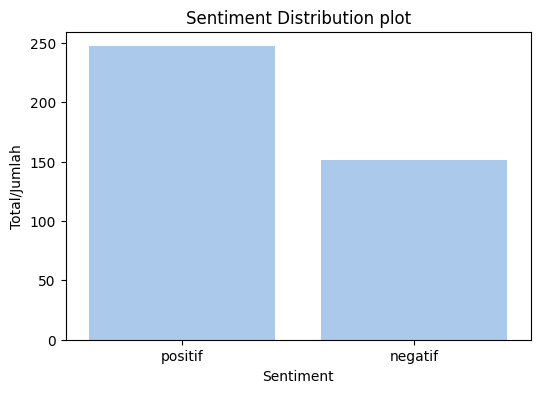

In [27]:
# The Viz
sns.set_palette('pastel')
plt.figure(figsize=(6,4))
sns.countplot(x='sentimen', data=df)
plt.title('Sentiment Distribution plot')
plt.xlabel('Sentiment')
plt.ylabel('Total/Jumlah')
plt.show()

In [28]:
data_sentimen_negatif = df[df['sentimen'] == 'negatif']
data_sentimen_positif = df[df['sentimen'] == 'positif']

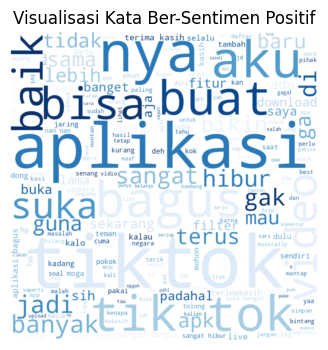

In [29]:
all_text_s1 = ' '.join(str(word) for word in data_sentimen_positif["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualisasi Kata Ber-Sentimen Positif')
plt.margins(x=0, y=0)
plt.show()

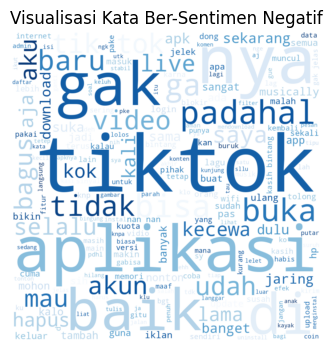

In [33]:
all_text_s1 = ' '.join(str(word) for word in data_sentimen_negatif["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualisasi Kata Ber-Sentimen Negatif')
plt.margins(x=0, y=0)
plt.show()

### DATA SPLITTING

In [34]:
# inisialisasi variable x dan y

X = df.content
y = df.sentimen

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Note: i dont know why how i'm still having NaN values over here, maybe i missed something but for now,
# sementara i handle the NaN values on here (NOT RECOMMENDED harusnya di tahap preprocess) soalnya males bjir.
# will fix the code soon (kalo ga males)
print(x_train.isna().sum())
print(y_train.isna().sum())
print(x_test.isna().sum())
print(y_test.isna().sum())

11
0
6
0


In [70]:
x_train = x_train.fillna('')
y_train = y_train.fillna('')
x_test = x_test.fillna('')

### TRAINING DATA (SVM, Naive Bayes, RandomForest)


In [43]:
# lakukan extraction data terlebih dahulu

cvec = CountVectorizer()
tvec = TfidfVectorizer()
hvec = HashingVectorizer()

#kenapa dilakukan extraction:


In [44]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

classifier_1 = SVC(kernel="linear")
classifier_2 = MultinomialNB()
classifier_3 = RandomForestClassifier()

In [45]:
# hasil dari inisialisasi kita combine dengan proses extraction pake pipline

model1 = Pipeline([('vectorizer', tvec), ('classifier', classifier_1)])
model2 = Pipeline([('vectorizer', tvec), ('classifier', classifier_2)])
model3 = Pipeline([('vectorizer', tvec), ('classifier', classifier_3)])

#kenapa dicombine classifier + extraction:

In [46]:
model1.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [51]:
result1 = model1.predict(x_test)

In [52]:
matrix = classification_report(y_test, result1)
print('Classification report : \n', matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.48      0.50      0.49        24
     positif       0.78      0.77      0.77        56

    accuracy                           0.69        80
   macro avg       0.63      0.63      0.63        80
weighted avg       0.69      0.69      0.69        80



##NAIVE BAYES

In [54]:
model2.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [55]:
result2 = model2.predict(x_test)

In [56]:
matrix = classification_report(y_test, result2)
print('Classification report : \n', matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.33      0.08      0.13        24
     positif       0.70      0.93      0.80        56

    accuracy                           0.68        80
   macro avg       0.52      0.51      0.47        80
weighted avg       0.59      0.68      0.60        80



## RANDOM FOREST CLASSIFIER


In [57]:
model3.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [58]:
result3 = model3.predict(x_test)

In [59]:
matrix = classification_report(y_test, result3)
print('Classification report : \n', matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.52      0.50      0.51        24
     positif       0.79      0.80      0.80        56

    accuracy                           0.71        80
   macro avg       0.66      0.65      0.65        80
weighted avg       0.71      0.71      0.71        80



In [61]:
hasilDecisionTreeClassifier = accuracy_score(result1, y_test)
precision1 = precision_score(y_test, result1, average='weighted')
recall1 = recall_score(y_test, result1, average='weighted')
f1_1 = f1_score(y_test, result1, average='weighted')

hasilMultinomialNB = accuracy_score(result2, y_test)
precision2 = precision_score(y_test, result2, average='weighted')
recall2 = recall_score(y_test, result2, average='weighted')
f1_2 = f1_score(y_test, result2, average='weighted')

hasilRandomForestClassifier = accuracy_score(result3, y_test)
precision3 = precision_score(y_test, result3, average='weighted')
recall3 = recall_score(y_test, result3, average='weighted')
f1_3 = f1_score(y_test, result3, average='weighted')

In [62]:
# Compare All Algorithms

model = { 'Model' : ['Decision Tree Classifier',
                     'Multinomial Naive Bayes',
                     'Random Forest Classifier',
                     ],
          'Accuracy Score':[hasilDecisionTreeClassifier, hasilMultinomialNB, hasilRandomForestClassifier],
          'Precision':[precision1, precision2, precision3],
          'Recall':[recall1, recall2, recall3],
          'F1-Score':[f1_1, f1_2, f1_3]
          }
model_df = pd.DataFrame(model)
model_df

,Model,Accuracy Score,Precision,Recall,F1-Score
0,Decision Tree Classifier,0.6875,0.691273,0.6875,0.689281
1,Multinomial Naive Bayes,0.6750,0.591892,0.6750,0.600000
2,Random Forest Classifier,0.7125,0.709153,0.7125,0.710714


In [63]:
"""Conclusion: Random Forest Menang telak.
    Note: sepertinya performance ke 3 model bisa lebih baik lagi kalo ga ngedrop NaN values di x_train test dll nya,
    instead di awal kek yang dibilang td hehe"""

'Conclusion: Random Forest Menang telak.\n    Note: sepertinya performance ke 3 model bisa lebih baik lagi kalo ga ngedrop NaN values di x_train test dll nya,\n    instead di awal kek yang dibilang td hehe'

### DATA TESTING

In [64]:
def classify_text(input_text):
  models = [
      ('DecisionTreeClassifier', model_decisionTree),
      ('MultinomialNB', model_multinomialNaiveBayes),
      ('RandomForestClassifier', model_randomForest)
  ]

  results = {}

  for name, model in models:
    prediction = model.predict([input_text])
    results[name] = prediction[0]

  return results

In [72]:
model_decisionTree = model1.fit(x_train, y_train)
model_multinomialNaiveBayes = model2.fit(x_train, y_train)
model_randomForest = model3.fit(x_train, y_train)

In [74]:
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")

results = classify_text(input_text)

print("Input kata: ", input_text)

print("\nHasil Klasifikasi: ")
for model, prediction in results.items():
  print(f"{model}: {prediction}")

Masukkan teks yang ingin diklasifikasikan: Anjay Bagus banget aplikasinya
Input kata:  Anjay Bagus banget aplikasinya

Hasil Klasifikasi: 
DecisionTreeClassifier: positif
MultinomialNB: positif
RandomForestClassifier: positif
